# Bài tập 4
## Yêu cầu:
- Sử dụng bộ dữ liệu các khuôn mặt sklearn.datasets.fetch_lfw_people, lấy min_faces_per_person=60
- Áp dụng PCA: chúng ta sẽ giảm chiều dữ liệu còn 150 chiều (gốc là ~3000 chiều)
- Trực quan hóa dữ liệu gốc và dữ liệu sau khi giảm chiều

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import fetch_lfw_people # Load the Labeled Faces in the Wild (LFW) people dataset

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60) # có 8 nhân vật, mỗi nhân vật có ít nhất 60 hình

In [4]:
faces.data.shape # 1348 dòng, 2914 cột (62x47)

(1348, 2914)

In [5]:
images = faces.images # dữ liệu của các hình
labels = faces.target # nhãn số của các hình
names = faces.target_names # nhãn tên của các hình

In [6]:
print(names) # tên các nhân vật

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [7]:
print(images.shape) # có 1348 hình, mỗi hình kích thước 62x47

(1348, 62, 47)


In [8]:
labels[1]

3

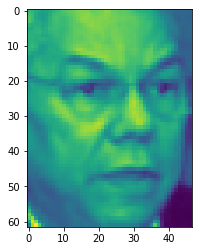

Hình của: Colin Powell


In [9]:
# vẽ một hình tại index = i
i = 0
img = images[i]
plt.imshow(img)
plt.show()
print('Hình của:', names[labels[i]])

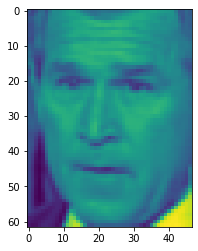

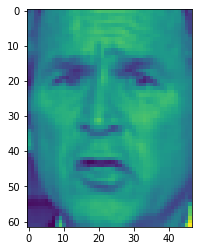

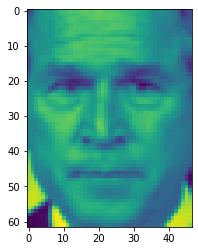

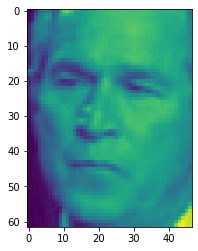

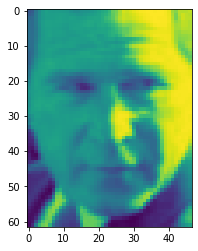

In [10]:
# 5 ảnh đầu tiên của George W Bush
for img in images[labels==3][:5]:
    plt.imshow(img)
    plt.show()

In [11]:
k = 150
pca = PCA(k)
pca.fit(faces.data)

PCA(n_components=150)

In [12]:
sum(pca.explained_variance_ratio_)

0.945669443171937

In [13]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

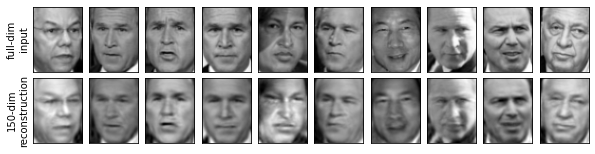

In [14]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
plt.show()